In [1]:
%pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 1.3 MB/s eta 0:00:03
      --------------------------------------- 0.0/3.0 MB 653.6 kB/s eta 0:00:05
     - -------------------------------------- 0.1/3.0 MB 930.9 kB/s eta 0:00:04
     -- ------------------------------------- 0.2/3.0 MB 1.0 MB/s eta 0:00:03
     --- ------------------------------------ 0.2/3.0 MB 1.2 MB/s eta 0:00:03
     ----- ---------------------------------- 0.4/3.0 MB 1.7 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/3.0 MB 1.7 MB/s eta 0:00:02
     ---------- ----------------------------- 0.8/3.0 MB 2.2 MB/s eta 0:00:01
     -------------- ------------------------- 1.0/3.0 MB 2.8 MB/s eta 0:00:01
     ---------------------- ----------------- 1.6/3.0 MB 3.7 MB/s eta 0:00:01
     ---------------------------- ----------- 2.1/3.0 MB 4.4 MB/s eta 0:00:01
     ------------------------------------ --- 2.7/3.0 MB 5.1 MB/s e


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import yfinance as yf
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
company = 'TSLA'
ticker = yf.Ticker(company)
df = ticker.history(start = '2014-1-1', end='2022-12-31')

df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-01-02 00:00:00-05:00,9.986667,10.165333,9.770000,10.006667,92826000,0.0,0.0
2014-01-03 00:00:00-05:00,10.000000,10.146000,9.906667,9.970667,70425000,0.0,0.0
2014-01-06 00:00:00-05:00,10.000000,10.026667,9.682667,9.800000,80416500,0.0,0.0
2014-01-07 00:00:00-05:00,9.841333,10.026667,9.683333,9.957333,75511500,0.0,0.0
2014-01-08 00:00:00-05:00,9.923333,10.246667,9.917333,10.085333,92448000,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,126.370003,128.619995,121.019997,123.150002,166989700,0.0,0.0
2022-12-27 00:00:00-05:00,117.500000,119.669998,108.760002,109.099998,208643400,0.0,0.0
2022-12-28 00:00:00-05:00,110.349998,116.269997,108.239998,112.709999,221070500,0.0,0.0


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days,len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x,0])

x_train,y_train = np.array(x_train),np.array(y_train)
#x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape

(2206, 60)

In [4]:
#Cargar los datos del test
hist_test = ticker.history(start = '2023-1-1', end='2024-9-23')
actual_prices = hist_test["Close"].values

total_dataset = pd.concat((df['Close'],hist_test['Close']),axis=0)
model_inputs = total_dataset[len(total_dataset)-len(hist_test)-prediction_days:].values
model_inputs = scaler.transform(model_inputs.reshape(-1,1))


In [5]:
x_test = []
y_test = []

for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])
  y_test.append(scaled_data[x,0])

x_test, y_test = np.array(x_test), np.array(y_test)
#x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_lr = LinearRegression()

model_lr.fit(x_train, y_train)

LinearRegression()

In [7]:
y_pred = model_lr.predict(x_test)

mse_lr = mean_squared_error(y_test, y_pred)

print("Error cuadrático medio: ", mse_lr)

Error cuadrático medio:  0.24214997186859347


In [8]:
predicted_prices = scaler.inverse_transform(y_pred.reshape(-1,1))

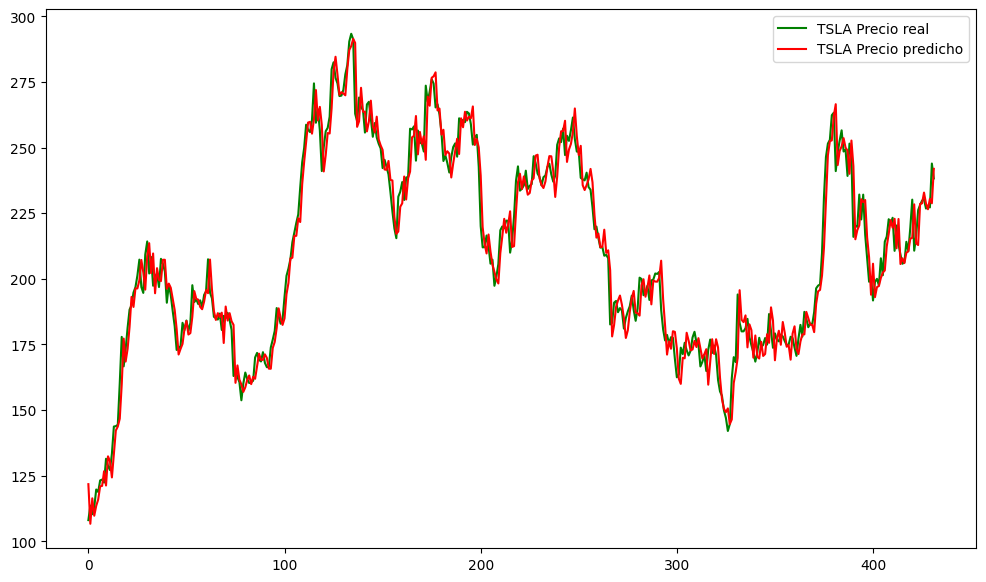

In [9]:
plt.figure(figsize=(12, 7))
plt.plot(actual_prices,color="green",label=f"{company} Precio real")
plt.plot(predicted_prices,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [10]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()

model_rf.fit(x_train, y_train)

RandomForestRegressor()

In [11]:
y_pred_rf = model_rf.predict(x_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Error cuadrático medio: ", mse_rf)

Error cuadrático medio:  0.24655090726992576


In [12]:
predicted_prices = scaler.inverse_transform(y_pred_rf.reshape(-1,1))

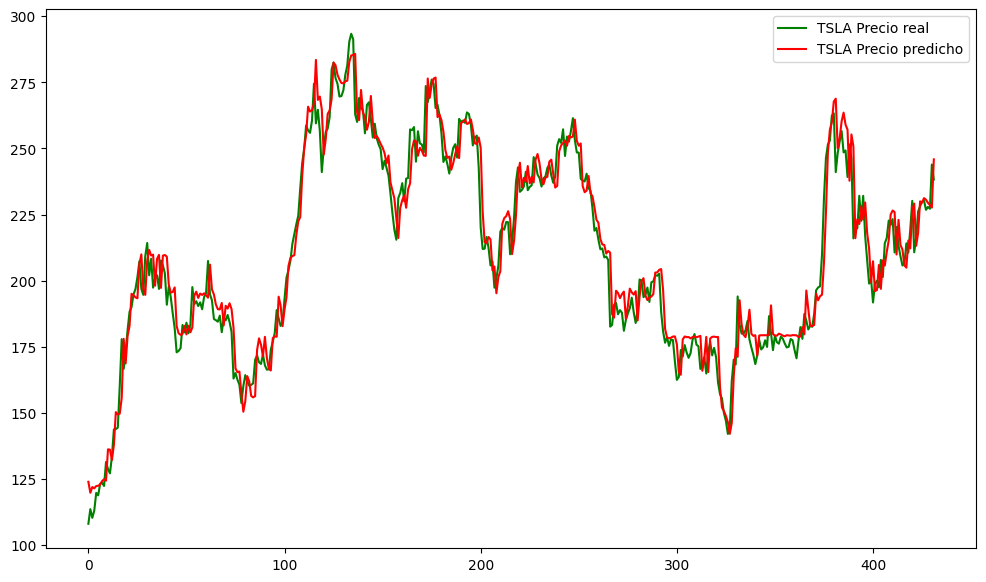

In [13]:
plt.figure(figsize=(12, 7))
plt.plot(actual_prices,color="green",label=f"{company} Precio real")
plt.plot(predicted_prices,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

# Crear y entrenar el modelo de Gradient Boosting
modelo_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

modelo_gb.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [15]:
# Realizar predicciones
y_pred_gb = modelo_gb.predict(x_test)

# Calcular MSE y MAE
mse_gb = mean_squared_error(y_test, y_pred_gb)

print("Error cuadrático medio: ", mse_gb)

Error cuadrático medio:  0.243598586243439


In [16]:
predicted_prices = scaler.inverse_transform(y_pred_gb.reshape(-1,1))

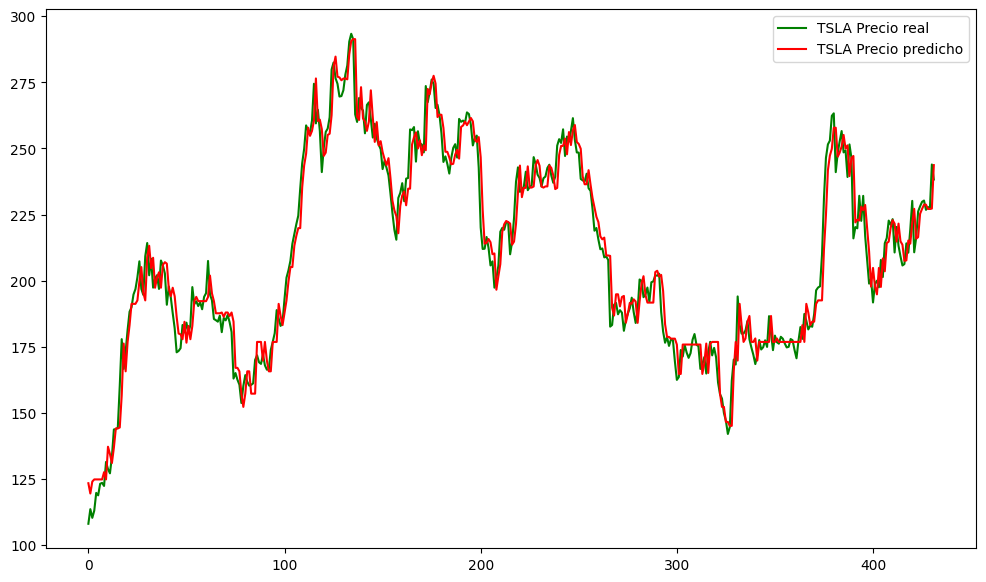

In [17]:
plt.figure(figsize=(12, 7))
plt.plot(actual_prices,color="green",label=f"{company} Precio real")
plt.plot(predicted_prices,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [18]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Aplicando modelo XGBoost de regresión
xgb_regressor = xgb.XGBRegressor()

# Definir los parámetros a buscar
parameters = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(xgb_regressor, parameters, cv=5, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros y el mejor estimador
#best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [20]:
# Realizar predicciones
y_pred_xg = best_estimator.predict(x_test)

# Calcular MSE
mse_xg = mean_squared_error(y_test, y_pred_xg)

print("Error cuadrático medio: ", mse_xg)

Error cuadrático medio:  0.24593289059758358


In [21]:
predicted_prices = scaler.inverse_transform(y_pred_xg.reshape(-1,1))

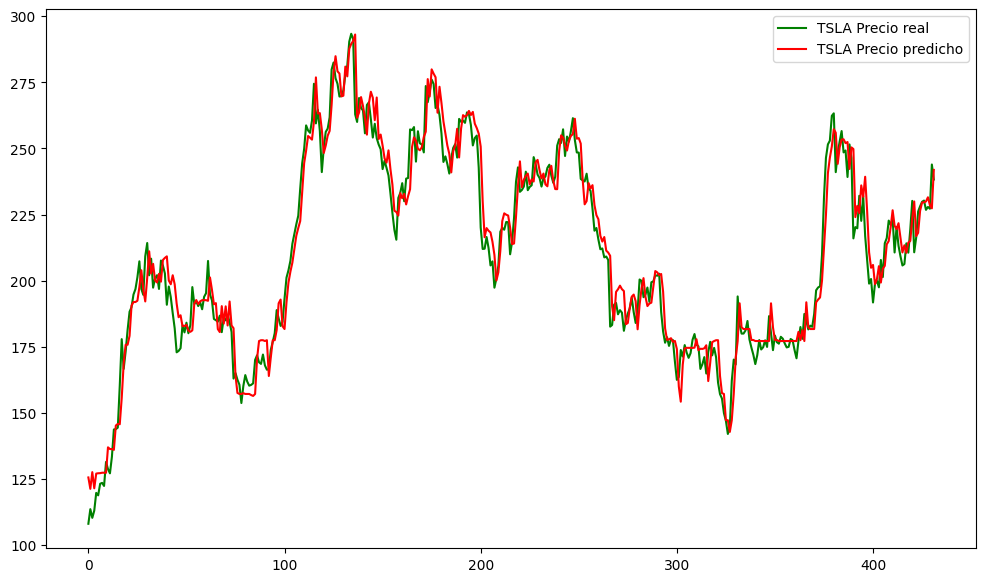

In [22]:
plt.figure(figsize=(12, 7))
plt.plot(actual_prices,color="green",label=f"{company} Precio real")
plt.plot(predicted_prices,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [23]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,GRU

In [25]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [26]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [27]:
#Red Neuronal GRU

modelo_gru = Sequential()

modelo_gru.add(GRU(units=50,return_sequences = True, input_shape=(x_train.shape[1],1)))
modelo_gru.add(Dropout(0.2))
modelo_gru.add(GRU(units=50,return_sequences = True))
modelo_gru.add(Dropout(0.2))
modelo_gru.add(GRU(units=50))
modelo_gru.add(Dropout(0.1))
modelo_gru.add(Dense(units=1))

modelo_gru.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
modelo_gru.fit(x_train,y_train,epochs=500,batch_size=32)

Epoch 1/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0156
Epoch 2/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0018
Epoch 3/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0015
Epoch 4/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0013
Epoch 5/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0013
Epoch 6/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - loss: 0.0012
Epoch 7/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 0.0013
Epoch 8/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - loss: 0.0012
Epoch 9/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - loss: 0.0013
Epoch 10/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 0.0010
Epoch 11/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 0.0011
Epoch 12/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 8.4435e-04
Epoch 13/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - loss: 8.7031e-04
Epoch 14/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 9.4035e-04
Epoch 15/500
69/69 ━━━━━━━━━━━━━━━━━━

In [29]:
# Realizar predicciones
y_pred_gru = modelo_gru.predict(x_test)

# Calcular MSE
mse_gru = mean_squared_error(y_test, y_pred_gru)

print("Error cuadrático medio: ", mse_gru)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
Error cuadrático medio:  0.24926845210459955


In [30]:
predicted_prices = scaler.inverse_transform(y_pred_xg.reshape(-1,1))

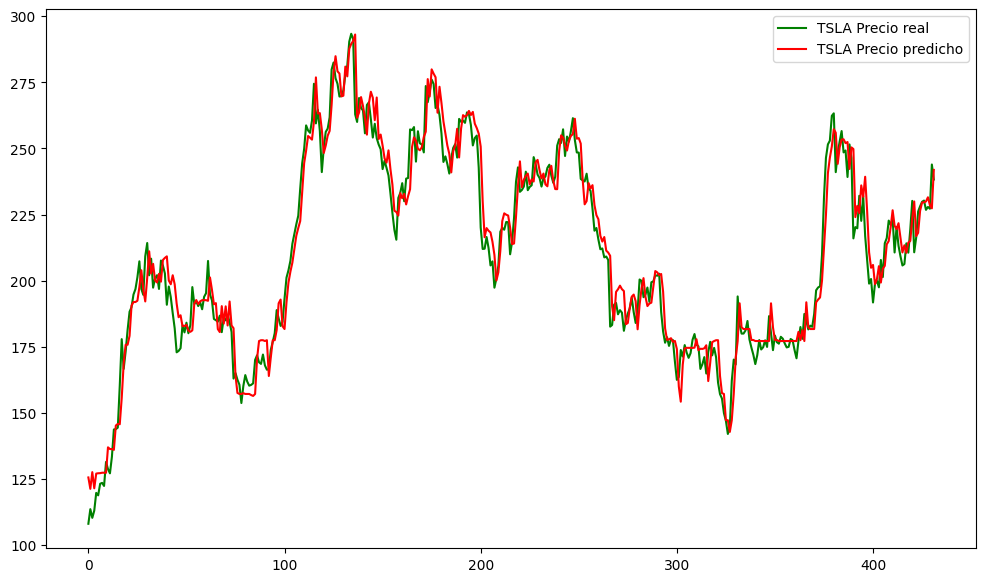

In [31]:
plt.figure(figsize=(12, 7))
plt.plot(actual_prices,color="green",label=f"{company} Precio real")
plt.plot(predicted_prices,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [32]:
# Red LSTM

dim_entrada = (x_train.shape[1],1)
dim_salida = 1
na = 50

modelo_lst = Sequential()
modelo_lst.add(LSTM(units=na, input_shape=dim_entrada))
modelo_lst.add(Dense(units=dim_salida))
modelo_lst.compile(optimizer='rmsprop', loss='mse')

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
modelo_lst.fit(x_train,y_train,epochs=500,batch_size=32)

Epoch 1/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0076
Epoch 2/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.5562e-04
Epoch 3/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.7862e-04
Epoch 4/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.7641e-04
Epoch 5/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.3369e-04
Epoch 6/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.4880e-04
Epoch 7/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.3682e-04
Epoch 8/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.1816e-04
Epoch 9/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.3868e-04
Epoch 10/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.3228e-04
Epoch 11/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.6190e-04
Epoch 12/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.6862e-04
Epoch 13/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.2249e-04
Epoch 14/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.5718e-04
Epoch

In [34]:
# Realizar predicciones
y_pred_lst = modelo_lst.predict(x_test)

# Calcular MSE
mse_lst = mean_squared_error(y_test, y_pred_lst)

print("Error cuadrático medio: ", mse_lst)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Error cuadrático medio:  0.24713538703750176


In [35]:
predicted_prices = scaler.inverse_transform(y_pred_lst.reshape(-1,1))

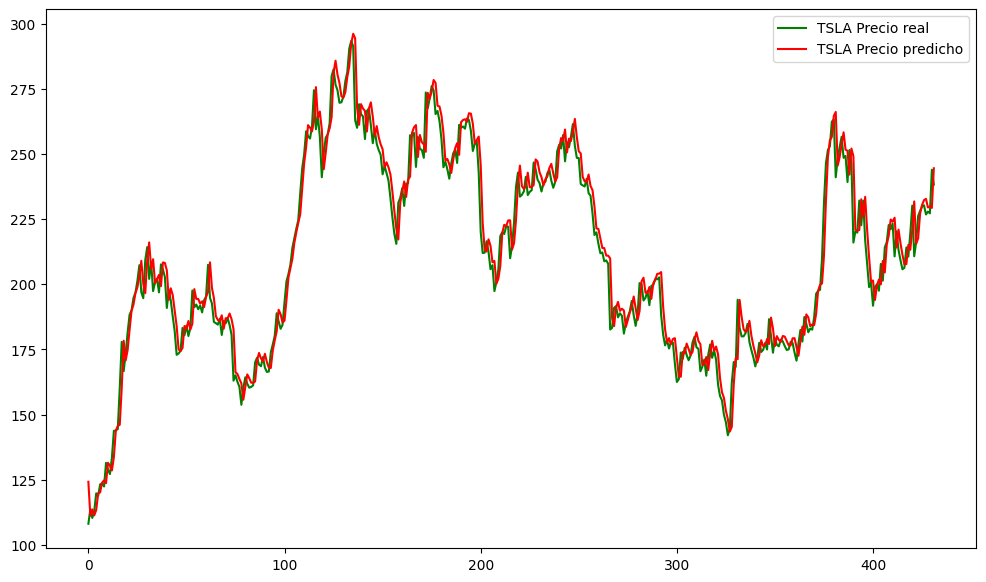

In [36]:
plt.figure(figsize=(12, 7))
plt.plot(actual_prices,color="green",label=f"{company} Precio real")
plt.plot(predicted_prices,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [37]:
df_mse = pd.DataFrame([['Regresión Lineal', mse_lr],
                       ['Randon Forest', mse_rf],
                       ['Gradiente Regressor', mse_gb],
                       ['XGBooster', mse_xg],
                       ['RNN GRU', mse_gru],
                       ['RNN LSTM', mse_lst]], columns=['Modelo', 'mse'])

df_mse

,Modelo,mse
0,Regresión Lineal,0.242150
1,Randon Forest,0.246864
2,Gradiente Regressor,0.243599
3,XGBooster,0.245933
4,RNN GRU,0.272350
5,RNN LSTM,0.247135


In [38]:
buy_signals = []
sell_signals = []
for i in range(1, len(predicted_prices)):
    if predicted_prices[i] > actual_prices[i-1]:
        buy_signals.append((i, actual_prices[i]))  # Alerta de compra
    elif predicted_prices[i] < actual_prices[i-1]:
        sell_signals.append((i, actual_prices[i]))  # Alerta de venta

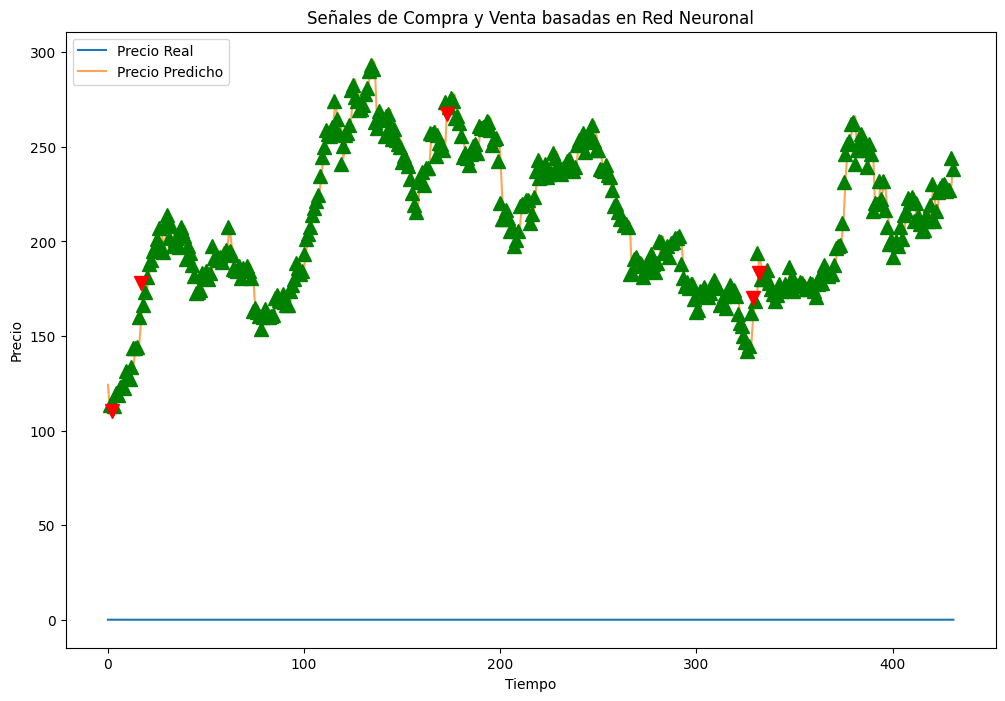

In [39]:
# Graficar las alertas sin las leyendas de "Compra" y "Venta"
plt.figure(figsize=(12, 8))
plt.plot(y_test, label='Precio Real')
plt.plot(predicted_prices, label='Precio Predicho', alpha=0.7)

# Señales de compra
for signal in buy_signals:
    plt.plot(signal[0], signal[1], marker='^', color='g', markersize=10)  # Quitar label='Compra'

# Señales de venta
for signal in sell_signals:
    plt.plot(signal[0], signal[1], marker='v', color='r', markersize=10)  # Quitar label='Venta'

plt.title('Señales de Compra y Venta basadas en Red Neuronal')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend(loc='upper left')  # Dejar sólo la leyenda para Precio Real y Predicho
plt.show()


In [50]:
%pip install -U polygon-api-client

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
rentability = 1
for i in range(1,len(y_test)):
  if predicted_prices[i] > y_test[i-1]:
    rentability*= y_test[i]/y_test[i-1]

print((rentability-1)*100,"%")

14.65778566917666 %


In [34]:
from polygon import RESTClient

# Key para API de Polygon.io
API_KEY = 'iYrWjtstbjV7E6w6GdOB1hFIY6EZ814p'

# Lista de tickers (limitado para simplificar pruebas)
tickers = ['AAPL', 'MSFT', 'NVDA', 'TSLA']
i = 0

# Listas para almacenar los datos de Polygon.io y yfinance
lista_polygon = []

client = RESTClient(API_KEY)

for a in client.list_aggs(ticker=tickers[i], multiplier=1, timespan="day", from_="2022-09-24", to="2024-09-23", limit=50000):
    lista_polygon.append(a)

print(len(lista_polygon))

488


In [35]:
# Key para API de Polygon.io
API_KEY = 'QHq8TBx82bQk6U5Lk2btkpESp6GmfMIS'

client = RESTClient(API_KEY)

for a in client.list_aggs(ticker=tickers[i], multiplier=1, timespan="day", from_="2019-09-24", to="2022-09-23", limit=50000):
    lista_polygon.append(a)

fechas = []
cierres = []

for i in range(len(lista_polygon)):
    fecha = pd.to_datetime(lista_polygon[i].timestamp, unit="ms")
    fechas.append(fecha)
    cierres.append(lista_polygon[i].close)

df = pd.DataFrame()
df["Date"] = fechas
df["Close"] = cierres

#df.set_index('Date', inplace=True)  # Usar 'Date' como índice

df

,Date,Close
0,2022-10-13 04:00:00,142.99
1,2022-10-14 04:00:00,138.38
2,2022-10-17 04:00:00,142.41
3,2022-10-18 04:00:00,143.75
4,2022-10-19 04:00:00,143.86
...,...,...
1226,2022-09-19 04:00:00,154.48
1227,2022-09-20 04:00:00,156.90
1228,2022-09-21 04:00:00,153.72
1229,2022-09-22 04:00:00,152.74


In [36]:
df['Days'] = (pd.to_datetime(df['Date']) - pd.to_datetime(df['Date']).min()).dt.days.astype('float64')
df

#df_polygon.index = pd.to_datetime(df_polygon.index).date

,Date,Close,Days
0,2022-10-13 04:00:00,142.99,1095.0
1,2022-10-14 04:00:00,138.38,1096.0
2,2022-10-17 04:00:00,142.41,1099.0
3,2022-10-18 04:00:00,143.75,1100.0
4,2022-10-19 04:00:00,143.86,1101.0
...,...,...,...
1226,2022-09-19 04:00:00,154.48,1071.0
1227,2022-09-20 04:00:00,156.90,1072.0
1228,2022-09-21 04:00:00,153.72,1073.0
1229,2022-09-22 04:00:00,152.74,1074.0


In [37]:
#dfTmp = df.loc[df['Days'] >= 1200.0]
dfTmp = df.query('Days > 1450.0')
dfTmp
# 1454 dias corresponde a 25/09/2023

,Date,Close,Days
244,2023-10-04 04:00:00,173.66,1451.0
245,2023-10-05 04:00:00,174.91,1452.0
246,2023-10-06 04:00:00,177.49,1453.0
247,2023-10-09 04:00:00,178.99,1456.0
248,2023-10-10 04:00:00,178.39,1457.0
...,...,...,...
483,2024-09-17 04:00:00,216.79,1800.0
484,2024-09-18 04:00:00,220.69,1801.0
485,2024-09-19 04:00:00,228.87,1802.0
486,2024-09-20 04:00:00,228.20,1803.0


In [38]:
df_tr = df.query('Days < 1454.0')

hist_test = df.query('Days >= 1454.0')

print(len(df_tr))
print(len(hist_test))

990
241


In [39]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df_tr['Close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days,len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x,0])

x_train,y_train = np.array(x_train),np.array(y_train)
#x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape


(930, 60)

In [40]:
#Cargar los datos del test
#hist_test = ticker.history(start = '2023-1-1', end='2024-9-23')
actual_prices = hist_test["Close"].values

total_dataset = pd.concat((df['Close'],hist_test['Close']),axis=0)
model_inputs = total_dataset[len(total_dataset)-len(hist_test)-prediction_days:].values
model_inputs = scaler.transform(model_inputs.reshape(-1,1))


In [41]:
x_test = []
y_test = []

for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])
  y_test.append(scaled_data[x,0])

x_test, y_test = np.array(x_test), np.array(y_test)
#x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [42]:
model_lr = LinearRegression()

model_lr.fit(x_train, y_train)

LinearRegression()

In [43]:
y_pred = model_lr.predict(x_test)

mse_lr = mean_squared_error(y_test, y_pred)

print("Error cuadrático medio: ", mse_lr)

Error cuadrático medio:  0.30837702889676477


In [44]:
predicted_prices = scaler.inverse_transform(y_pred.reshape(-1,1))

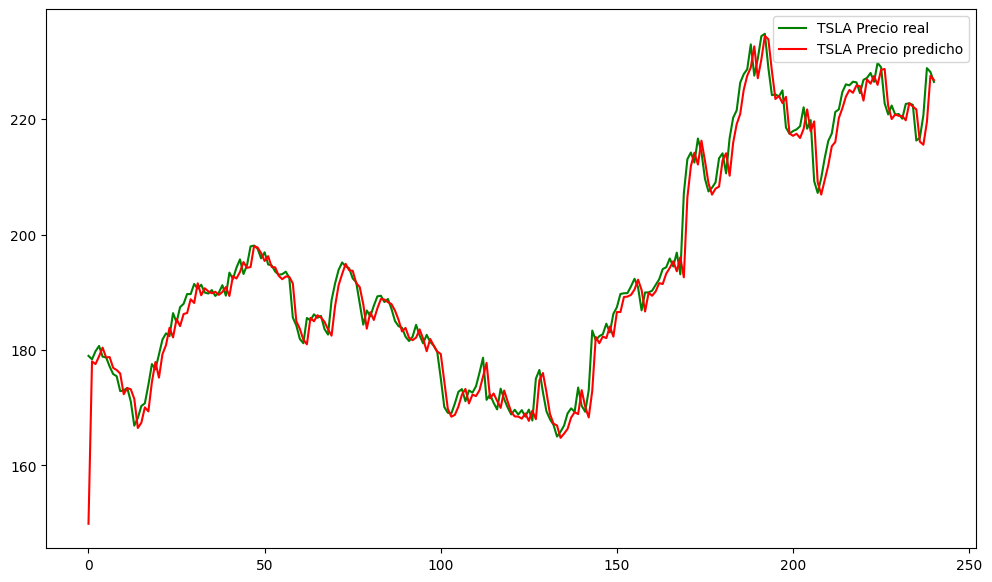

In [45]:
plt.figure(figsize=(12, 7))
plt.plot(actual_prices,color="green",label=f"{company} Precio real")
plt.plot(predicted_prices,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [46]:
model_rf = RandomForestRegressor()

model_rf.fit(x_train, y_train)

RandomForestRegressor()

In [47]:
y_pred_rf = model_rf.predict(x_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Error cuadrático medio: ", mse_rf)

Error cuadrático medio:  0.17644120519607248


In [48]:
predicted_prices = scaler.inverse_transform(y_pred_rf.reshape(-1,1))

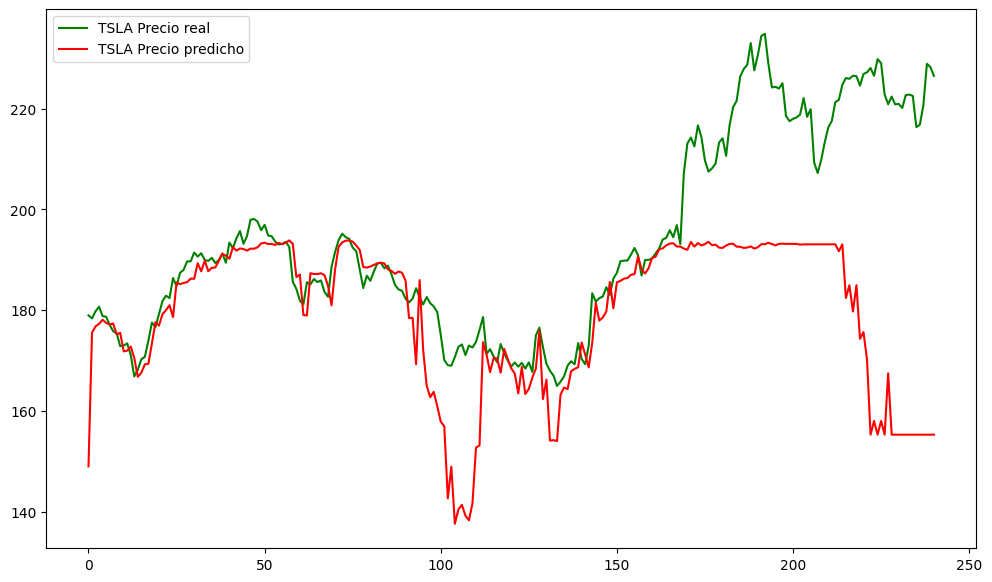

In [49]:
plt.figure(figsize=(12, 7))
plt.plot(actual_prices,color="green",label=f"{company} Precio real")
plt.plot(predicted_prices,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [50]:
# Crear y entrenar el modelo de Gradient Boosting
modelo_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

modelo_gb.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [51]:
# Realizar predicciones
y_pred_gb = modelo_gb.predict(x_test)

# Calcular MSE y MAE
mse_gb = mean_squared_error(y_test, y_pred_gb)

print("Error cuadrático medio: ", mse_gb)

Error cuadrático medio:  0.1469910959743716


In [52]:
predicted_prices = scaler.inverse_transform(y_pred_gb.reshape(-1,1))

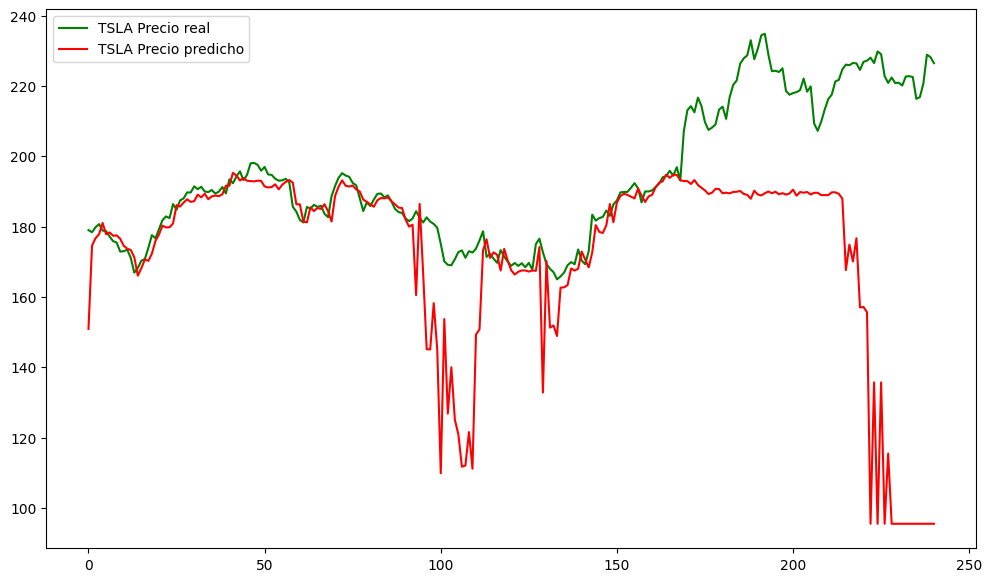

In [53]:
plt.figure(figsize=(12, 7))
plt.plot(actual_prices,color="green",label=f"{company} Precio real")
plt.plot(predicted_prices,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [54]:
# Aplicando modelo XGBoost de regresión
xgb_regressor = xgb.XGBRegressor()

# Definir los parámetros a buscar
parameters = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(xgb_regressor, parameters, cv=5, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros y el mejor estimador
#best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [55]:
# Realizar predicciones
y_pred_xg = best_estimator.predict(x_test)

# Calcular MSE
mse_xg = mean_squared_error(y_test, y_pred_xg)

print("Error cuadrático medio: ", mse_xg)

Error cuadrático medio:  0.17858827295212426


In [56]:
predicted_prices = scaler.inverse_transform(y_pred_xg.reshape(-1,1))

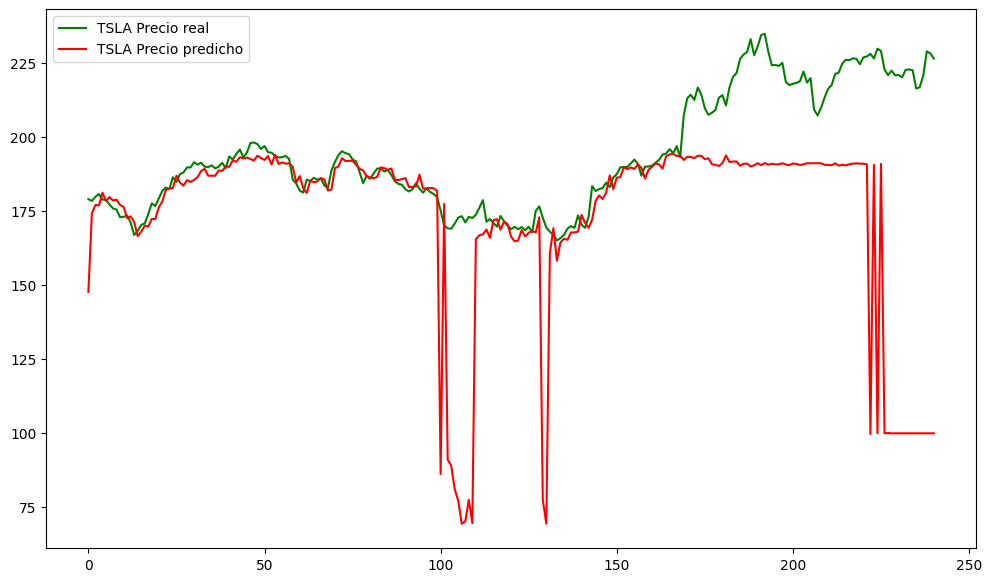

In [57]:
plt.figure(figsize=(12, 7))
plt.plot(actual_prices,color="green",label=f"{company} Precio real")
plt.plot(predicted_prices,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [82]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [83]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [84]:
#Red Neuronal GRU

modelo_gru = Sequential()

modelo_gru.add(GRU(units=50,return_sequences = True, input_shape=(x_train.shape[1],1)))
modelo_gru.add(Dropout(0.2))
modelo_gru.add(GRU(units=50,return_sequences = True))
modelo_gru.add(Dropout(0.2))
modelo_gru.add(GRU(units=50))
modelo_gru.add(Dropout(0.1))
modelo_gru.add(Dense(units=1))

modelo_gru.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\Jimmy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [85]:
modelo_gru.fit(x_train,y_train,epochs=500,batch_size=32)

Epoch 1/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0662
Epoch 2/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0078
Epoch 3/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0069
Epoch 4/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0064
Epoch 5/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0061
Epoch 6/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0059
Epoch 7/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0056
Epoch 8/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0062
Epoch 9/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0050
Epoch 10/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0051
Epoch 11/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0098
Epoch 12/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0037
Epoch 13/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0067
Epoch 14/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0034
Epoch 15/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - lo

In [86]:
# Realizar predicciones
y_pred_gru = modelo_gru.predict(x_test)

# Calcular MSE
mse_gru = mean_squared_error(y_test, y_pred_gru)

print("Error cuadrático medio: ", mse_gru)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
Error cuadrático medio:  0.31585859775390535


In [87]:
predicted_prices = scaler.inverse_transform(y_pred_xg.reshape(-1,1))

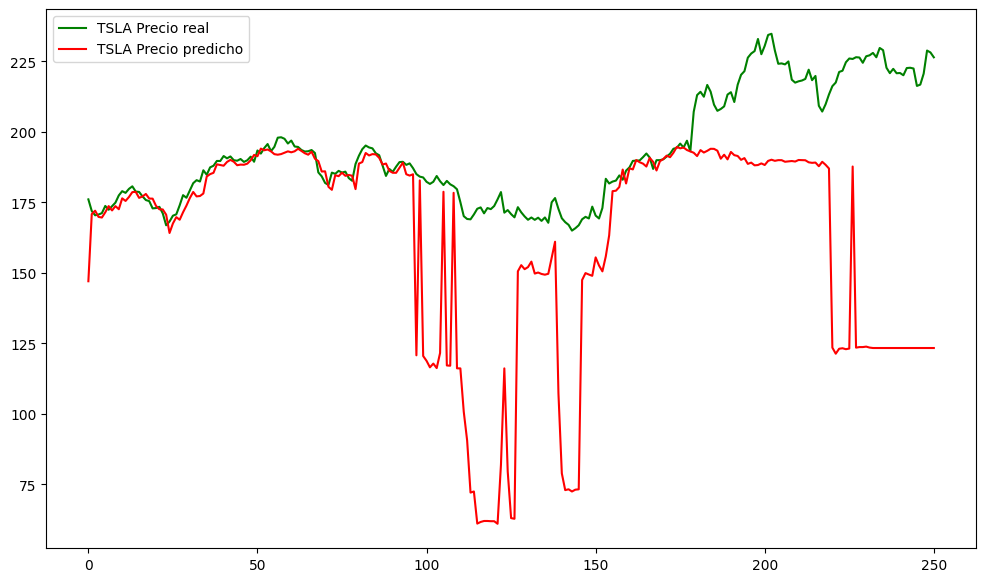

In [88]:
plt.figure(figsize=(12, 7))
plt.plot(actual_prices,color="green",label=f"{company} Precio real")
plt.plot(predicted_prices,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [89]:
# Red LSTM

dim_entrada = (x_train.shape[1],1)
dim_salida = 1
na = 50

modelo_lst = Sequential()
modelo_lst.add(LSTM(units=na, input_shape=dim_entrada))
modelo_lst.add(Dense(units=dim_salida))
modelo_lst.compile(optimizer='rmsprop', loss='mse')

c:\Users\Jimmy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [90]:
modelo_lst.fit(x_train,y_train,epochs=500,batch_size=32)

Epoch 1/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1213
Epoch 2/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0111
Epoch 3/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093
Epoch 4/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0064
Epoch 5/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0044
Epoch 6/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0062
Epoch 7/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0036
Epoch 8/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0026
Epoch 9/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0057
Epoch 10/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052
Epoch 11/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0021
Epoch 12/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0029
Epoch 13/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045
Epoch 14/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0025
Epoch 15/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - lo

In [91]:
# Realizar predicciones
y_pred_lst = modelo_lst.predict(x_test)

# Calcular MSE
mse_lst = mean_squared_error(y_test, y_pred_lst)

print("Error cuadrático medio: ", mse_lst)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Error cuadrático medio:  0.34939000191955816


In [92]:
predicted_prices = scaler.inverse_transform(y_pred_lst.reshape(-1,1))

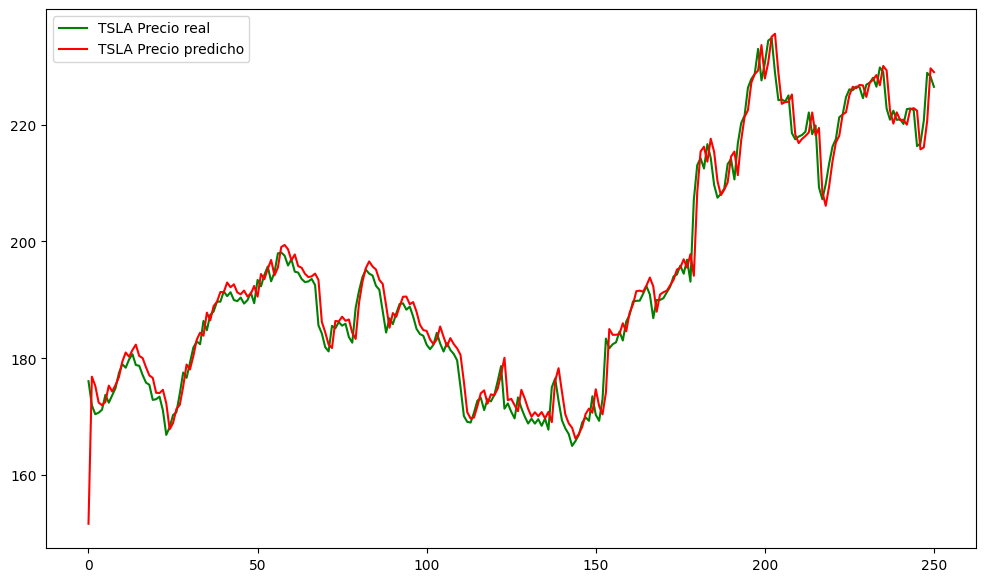

In [93]:
plt.figure(figsize=(12, 7))
plt.plot(actual_prices,color="green",label=f"{company} Precio real")
plt.plot(predicted_prices,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [94]:
df_mse = pd.DataFrame([['Regresión Lineal', mse_lr],
                       ['Randon Forest', mse_rf],
                       ['Gradiente Regressor', mse_gb],
                       ['XGBooster', mse_xg],
                       ['RNN GRU', mse_gru],
                       ['RNN LSTM', mse_lst]], columns=['Modelo', 'mse'])

df_mse

,Modelo,mse
0,Regresión Lineal,0.343627
1,Randon Forest,0.212975
2,Gradiente Regressor,0.149374
3,XGBooster,0.228075
4,RNN GRU,0.315859
5,RNN LSTM,0.349390


In [95]:
buy_signals = []
sell_signals = []
for i in range(1, len(predicted_prices)):
    if predicted_prices[i] > actual_prices[i-1]:
        buy_signals.append((i, actual_prices[i]))  # Alerta de compra
    elif predicted_prices[i] < actual_prices[i-1]:
        sell_signals.append((i, actual_prices[i]))  # Alerta de venta

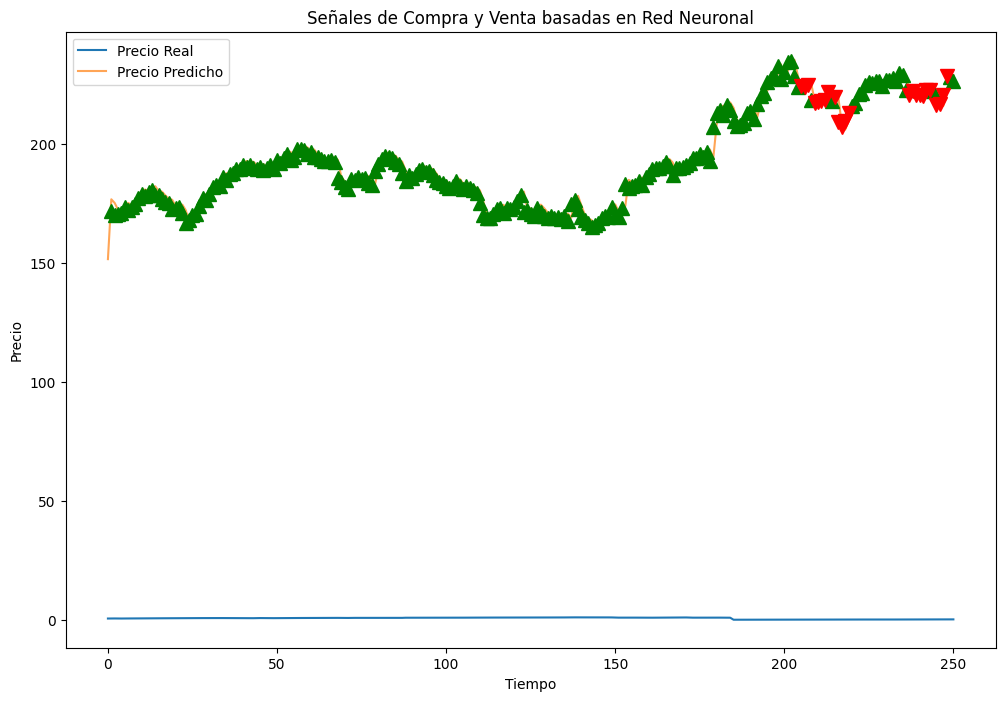

In [96]:
# Graficar las alertas sin las leyendas de "Compra" y "Venta"
plt.figure(figsize=(12, 8))
plt.plot(y_test, label='Precio Real')
plt.plot(predicted_prices, label='Precio Predicho', alpha=0.7)

# Señales de compra
for signal in buy_signals:
    plt.plot(signal[0], signal[1], marker='^', color='g', markersize=10)  # Quitar label='Compra'

# Señales de venta
for signal in sell_signals:
    plt.plot(signal[0], signal[1], marker='v', color='r', markersize=10)  # Quitar label='Venta'

plt.title('Señales de Compra y Venta basadas en Red Neuronal')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend(loc='upper left')  # Dejar sólo la leyenda para Precio Real y Predicho
plt.show()

In [58]:
rentability = 1
for i in range(1,len(y_test)):
  if predicted_prices[i] > y_test[i-1]:
    rentability*= y_test[i]/y_test[i-1]

print((rentability-1)*100,"%")

-77.50795511639592 %
